# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Loading Dataset

In [2]:
train_data=pd.read_csv(r'C:\Users\brainiac Abhinav\Desktop\Datasets\House Price Prediction\train.csv')

In [3]:
train_data.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.shape

(1460, 81)

In [5]:
isnull_num=train_data.isnull().sum()
isnull_num

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

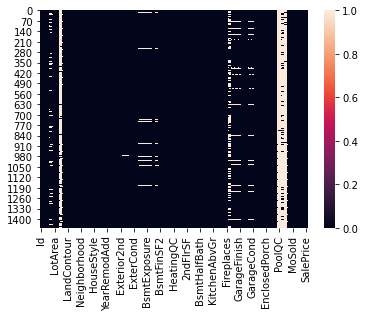

In [6]:
sns.heatmap(train_data.isnull())

# Columns with no missing Value

In [7]:
clean_value=[var for var in train_data.columns  if isnull_num[var]==0]

In [8]:
clean_value

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'SalePrice']

In [9]:
num_var=train_data.select_dtypes(include=["int64","float64"]).columns

In [10]:
num_var

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Numerical Columns With Missing Value

In [11]:
num_var_miss=[var for var in num_var if isnull_num[var]>0]
num_var_miss

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# Catagorical Columns With Missing Value

In [12]:
cat_var=train_data.select_dtypes(include=['O']).columns
cat_var_miss=[var for var in cat_var if isnull_num[var]>0]
cat_var_miss

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

# Distplot For Determining Using Mean or Median

C:\Users\brainiac Abhinav\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\brainiac Abhinav\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\brainiac Abhinav\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

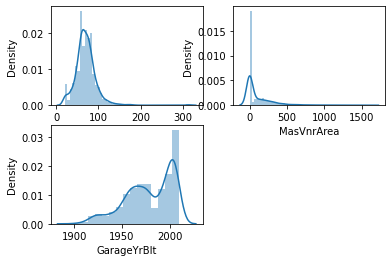

In [13]:
j=1
for i in num_var_miss:
    plt.subplot(2,2,j)
    sns.distplot(train_data[i],kde=True)
    j=j+1


In [14]:
#column in which mean strategy is used
num_var_mean=['LotFrontage']
#column in which median strategy is used
num_var_median=['MasVnrArea','GarageYrBlt']

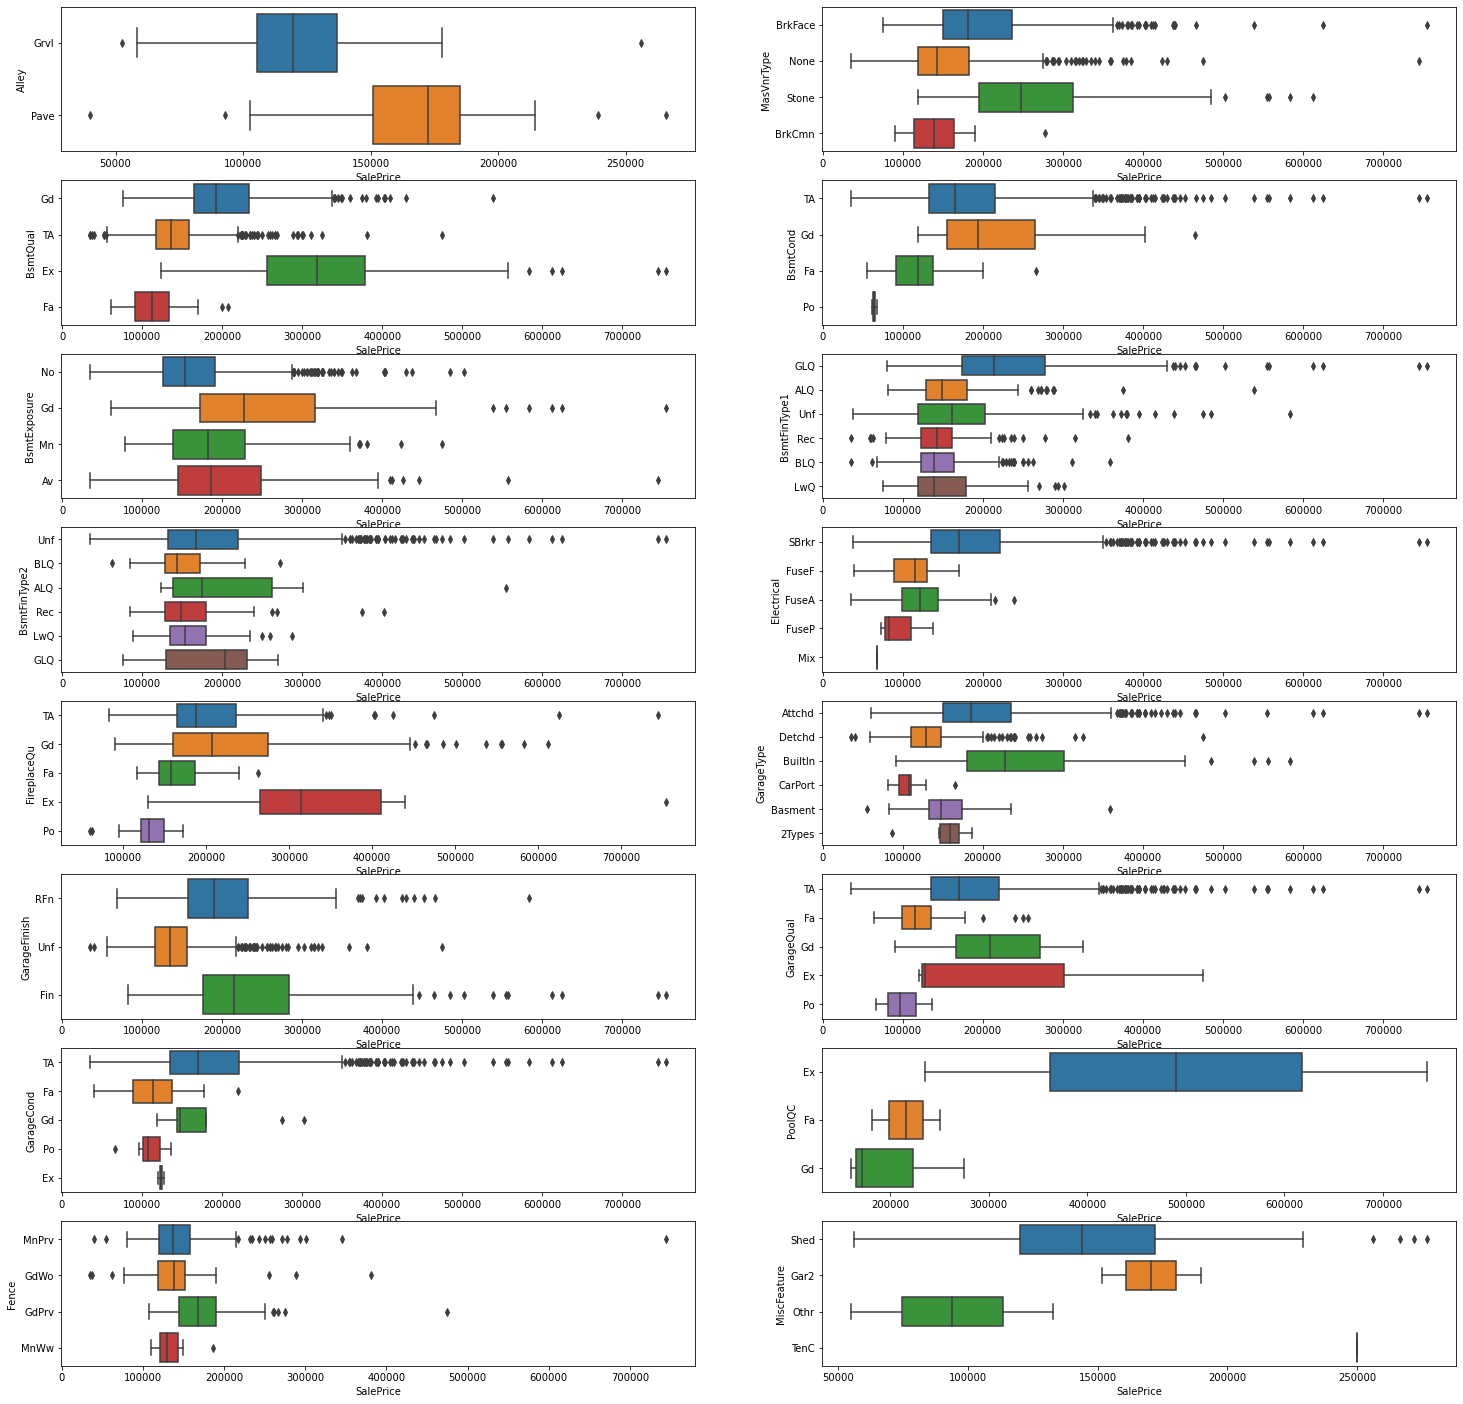

In [15]:
plt.figure(figsize=(25,25))
j=1
for i in cat_var_miss:
    plt.subplot(8,2,j)
    sns.boxplot(x=train_data['SalePrice'],y=train_data[i],data=train_data)
    j=j+1

# Pipeline with Simple Imputer

In [16]:
num_var_mean_imputer=Pipeline(steps=[("imputer",SimpleImputer(strategy="mean"))])
num_var_median_imputer=Pipeline(steps=[("imputer",SimpleImputer(strategy="median"))])
cat_var_mode_imputer=Pipeline(steps=[("imputer",SimpleImputer(strategy='most_frequent'))])

# ColumnTransformer

In [17]:
processor=ColumnTransformer(transformers=[("mean_imputer",num_var_mean_imputer,num_var_mean),
                               ("median_imputer",num_var_median_imputer,num_var_median),
                               ("mode_imputer",cat_var_mode_imputer,cat_var_miss)])

In [18]:
processor.fit(train_data)

ColumnTransformer(transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['MasVnrArea', 'GarageYrBlt']),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Electrical', 'FireplaceQu',
                                  'GarageType', 'GarageFinish', 'GarageQual',
                                  'GarageCond',

In [19]:
processor.transformers_

[('mean_imputer',
  Pipeline(steps=[('imputer', SimpleImputer())]),
  ['LotFrontage']),
 ('median_imputer',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))]),
  ['MasVnrArea', 'GarageYrBlt']),
 ('mode_imputer',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))]),
  ['Alley',
   'MasVnrType',
   'BsmtQual',
   'BsmtCond',
   'BsmtExposure',
   'BsmtFinType1',
   'BsmtFinType2',
   'Electrical',
   'FireplaceQu',
   'GarageType',
   'GarageFinish',
   'GarageQual',
   'GarageCond',
   'PoolQC',
   'Fence',
   'MiscFeature']),
 ('remainder',
  'drop',
  [0,
   1,
   2,
   4,
   5,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   27,
   28,
   29,
   34,
   36,
   37,
   38,
   39,
   40,
   41,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   61,
   62,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   75,
   76,
   77,
   

In [20]:
processor.named_transformers_["mode_imputer"].named_steps["imputer"].statistics_

array(['Grvl', 'None', 'TA', 'TA', 'No', 'Unf', 'Unf', 'SBrkr', 'Gd',
       'Attchd', 'Unf', 'TA', 'TA', 'Gd', 'MnPrv', 'Shed'], dtype=object)

In [21]:
processor.named_transformers_["mean_imputer"].named_steps["imputer"].statistics_

array([70.04995837])

# Data without Missing Values

In [22]:
clean_data=processor.transform(train_data)

In [23]:
train_data1=pd.DataFrame(clean_data,columns=num_var_mean+num_var_median+cat_var_miss)

In [24]:
train_data1.shape

(1460, 19)

# Concatination of clean data and data with no missing Values

In [25]:
train_data_clean=pd.concat([train_data1,train_data[clean_value]],axis=1)
train_data_clean

,LotFrontage,MasVnrArea,GarageYrBlt,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,65.0,196.0,2003.0,Grvl,BrkFace,Gd,TA,No,GLQ,Unf,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,80.0,0.0,1976.0,Grvl,None,Gd,TA,Gd,ALQ,Unf,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,68.0,162.0,2001.0,Grvl,BrkFace,Gd,TA,Mn,GLQ,Unf,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,60.0,0.0,1998.0,Grvl,None,TA,Gd,No,ALQ,Unf,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,84.0,350.0,2000.0,Grvl,BrkFace,Gd,TA,Av,GLQ,Unf,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,0.0,1999.0,Grvl,None,Gd,TA,No,Unf,Unf,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,85.0,119.0,1978.0,Grvl,Stone,Gd,TA,No,ALQ,Rec,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,66.0,0.0,1941.0,Grvl,None,TA,Gd,No,GLQ,Unf,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,68.0,0.0,1950.0,Grvl,None,TA,TA,Mn,GLQ,Rec,...,112,0,0,0,0,4,2010,WD,Normal,142125


<AxesSubplot:>

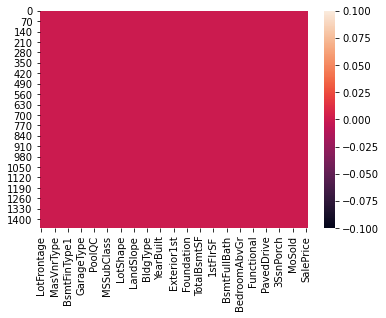

In [26]:
sns.heatmap(train_data_clean.isnull())

<AxesSubplot:>

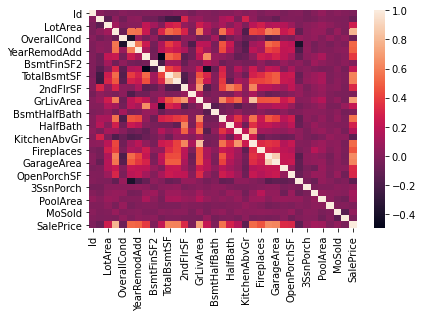

In [27]:
sns.heatmap(train_data_clean.corr())

In [28]:
train_data_clean.isnull().sum()

LotFrontage      0
MasVnrArea       0
GarageYrBlt      0
Alley            0
MasVnrType       0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

# Importing Label Encoder for Nominal Catagorical Columns

In [30]:
cat_var

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [31]:

train_data_clean[cat_var].head(100)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,RL,Pave,Grvl,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,...,BuiltIn,Fin,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
96,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
97,RL,Pave,Grvl,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,...,Attchd,Fin,TA,TA,P,Gd,MnPrv,Shed,WD,Normal
98,RL,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,...,Basment,Unf,Fa,TA,Y,Gd,MnPrv,Shed,COD,Abnorml


In [32]:
ord_var=[ 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond',
        'HeatingQC', 'KitchenQual',
        'FireplaceQu', 'GarageQual',
       'GarageCond']
nom_var=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'CentralAir', 'Electrical',
       'Functional', 'GarageType', 'GarageFinish',
        'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for i in nom_var:
    train_data_clean[i]=label_encoder.fit_transform(train_data_clean[i])

In [34]:
train_data_clean.head(10)

,LotFrontage,MasVnrArea,GarageYrBlt,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,65.0,196.0,2003.0,0,1,Gd,TA,3,2,5,...,0,0,0,0,0,2,2008,8,4,208500
1,80.0,0.0,1976.0,0,2,Gd,TA,1,0,5,...,0,0,0,0,0,5,2007,8,4,181500
2,68.0,162.0,2001.0,0,1,Gd,TA,2,2,5,...,0,0,0,0,0,9,2008,8,4,223500
3,60.0,0.0,1998.0,0,2,TA,Gd,3,0,5,...,272,0,0,0,0,2,2006,8,0,140000
4,84.0,350.0,2000.0,0,1,Gd,TA,0,2,5,...,0,0,0,0,0,12,2008,8,4,250000
5,85.0,0.0,1993.0,0,2,Gd,TA,3,2,5,...,0,320,0,0,700,10,2009,8,4,143000
6,75.0,186.0,2004.0,0,3,Ex,TA,0,2,5,...,0,0,0,0,0,8,2007,8,4,307000
7,70.049958,240.0,1973.0,0,3,Gd,TA,2,0,1,...,228,0,0,0,350,11,2009,8,4,200000
8,51.0,0.0,1931.0,0,2,TA,TA,3,5,5,...,205,0,0,0,0,4,2008,8,0,129900
9,50.0,0.0,1939.0,0,2,TA,TA,3,2,5,...,0,0,0,0,0,1,2008,8,4,118000


In [35]:
train_data_clean.isnull().sum().sum()

0

# For Ordinal Variables

In [36]:
for i in ord_var:
    print(train_data_clean[i].value_counts())

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64
TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [37]:
order_label={'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}

In [38]:
for i in ord_var:
   train_data_clean[i]= train_data_clean[i].map(order_label)

In [39]:
train_data_clean.head(10)

,LotFrontage,MasVnrArea,GarageYrBlt,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,65.0,196.0,2003.0,0,1,3,2,3,2,5,...,0,0,0,0,0,2,2008,8,4,208500
1,80.0,0.0,1976.0,0,2,3,2,1,0,5,...,0,0,0,0,0,5,2007,8,4,181500
2,68.0,162.0,2001.0,0,1,3,2,2,2,5,...,0,0,0,0,0,9,2008,8,4,223500
3,60.0,0.0,1998.0,0,2,2,3,3,0,5,...,272,0,0,0,0,2,2006,8,0,140000
4,84.0,350.0,2000.0,0,1,3,2,0,2,5,...,0,0,0,0,0,12,2008,8,4,250000
5,85.0,0.0,1993.0,0,2,3,2,3,2,5,...,0,320,0,0,700,10,2009,8,4,143000
6,75.0,186.0,2004.0,0,3,4,2,0,2,5,...,0,0,0,0,0,8,2007,8,4,307000
7,70.049958,240.0,1973.0,0,3,3,2,2,0,1,...,228,0,0,0,350,11,2009,8,4,200000
8,51.0,0.0,1931.0,0,2,2,2,3,5,5,...,205,0,0,0,0,4,2008,8,0,129900
9,50.0,0.0,1939.0,0,2,2,2,3,2,5,...,0,0,0,0,0,1,2008,8,4,118000


In [40]:
train_data_clean.isnull().sum().sum()

0

In [41]:
x=train_data_clean.iloc[:,:-1]
x

,LotFrontage,MasVnrArea,GarageYrBlt,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,65.0,196.0,2003.0,0,1,3,2,3,2,5,...,61,0,0,0,0,0,2,2008,8,4
1,80.0,0.0,1976.0,0,2,3,2,1,0,5,...,0,0,0,0,0,0,5,2007,8,4
2,68.0,162.0,2001.0,0,1,3,2,2,2,5,...,42,0,0,0,0,0,9,2008,8,4
3,60.0,0.0,1998.0,0,2,2,3,3,0,5,...,35,272,0,0,0,0,2,2006,8,0
4,84.0,350.0,2000.0,0,1,3,2,0,2,5,...,84,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,0.0,1999.0,0,2,3,2,3,5,5,...,40,0,0,0,0,0,8,2007,8,4
1456,85.0,119.0,1978.0,0,3,3,2,3,0,4,...,0,0,0,0,0,0,2,2010,8,4
1457,66.0,0.0,1941.0,0,2,2,3,3,2,5,...,60,0,0,0,0,2500,5,2010,8,4
1458,68.0,0.0,1950.0,0,2,2,2,2,2,4,...,0,112,0,0,0,0,4,2010,8,4


In [42]:
y=train_data_clean['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# Train Test Split

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 80)
(438, 80)
(1022,)
(438,)


# Standardization

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc=StandardScaler()
sc.fit(x_train)

StandardScaler()

In [47]:
sc.mean_

array([7.03145715e+01, 1.04952055e+02, 1.97874658e+03, 2.34833659e-02,
       1.74363992e+00, 2.56653620e+00, 2.00978474e+00, 2.28962818e+00,
       2.76810176e+00, 4.72994129e+00, 3.69178082e+00, 2.71722114e+00,
       2.23189824e+00, 1.22113503e+00, 1.98434442e+00, 1.98043053e+00,
       1.99510763e+00, 1.88747554e+00, 1.99804305e+00, 7.32338552e+02,
       5.70596869e+01, 3.04305284e+00, 1.07454374e+04, 9.96086106e-01,
       1.91976517e+00, 2.80039139e+00, 9.78473581e-04, 2.92954990e+00,
       6.45792564e-02, 1.21076321e+01, 2.03033268e+00, 2.00391389e+00,
       4.92172211e-01, 3.05381605e+00, 6.12818004e+00, 5.56457926e+00,
       1.97099511e+03, 1.98475734e+03, 1.42465753e+00, 1.07729941e+00,
       9.66927593e+00, 1.04442270e+01, 2.39138943e+00, 2.07925636e+00,
       1.40704501e+00, 4.46176125e+02, 4.23688845e+01, 5.71223092e+02,
       1.05976810e+03, 1.03913894e+00, 3.14481409e+00, 9.26614481e-01,
       1.16973777e+03, 3.53738748e+02, 5.76614481e+00, 1.52924266e+03,
      

In [48]:
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)
x_train

array([[ 0.42065403,  1.06137248, -0.36233452, ...,  0.14029267,
         0.30638205,  0.20441518],
       [-1.53376969, -0.14468026,  1.08757104, ..., -1.36896114,
         0.30638205,  0.20441518],
       [ 0.07320092, -0.6085467 ,  1.25327453, ...,  1.64954649,
        -3.66557293,  0.20441518],
       ...,
       [-0.44797874, -0.6085467 , -0.90087087, ..., -1.36896114,
         0.30638205,  0.20441518],
       [-0.66513693, -0.6085467 , -2.22649881, ..., -0.61433423,
         0.30638205,  0.20441518],
       [-0.75200021,  0.14523626,  1.17042278, ...,  0.89491958,
         0.30638205,  0.20441518]])

In [49]:
x_train=pd.DataFrame(x_train,columns=num_var_mean+num_var_median+cat_var_miss+clean_value[:-1])
x_train

,LotFrontage,MasVnrArea,GarageYrBlt,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.420654,1.061372,-0.362335,-0.155074,-1.187425,-0.827554,-0.03375,0.627380,1.214400,0.295523,...,-0.715974,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.514944,0.140293,0.306382,0.204415
1,-1.533770,-0.144680,1.087571,-0.155074,-1.187425,0.633172,-0.03375,-1.138963,-0.417933,0.295523,...,-0.311187,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.514944,-1.368961,0.306382,0.204415
2,0.073201,-0.608547,1.253275,-0.155074,0.409349,0.633172,-0.03375,-0.255791,-0.417933,0.295523,...,-0.065423,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.137417,1.649546,-3.665573,0.204415
3,0.594381,1.142549,1.128997,-0.155074,2.006123,2.093898,3.41549,0.627380,1.214400,0.295523,...,2.045255,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-1.269997,-0.614334,0.306382,0.204415
4,-1.186317,-0.608547,0.714738,-0.155074,0.409349,0.633172,-0.03375,-2.022134,-0.417933,-5.175933,...,0.165884,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.892471,0.894920,-1.679595,0.204415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,0.333791,-0.608547,1.128997,-0.155074,0.409349,0.633172,-0.03375,0.627380,-0.417933,0.295523,...,-0.397927,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-1.269997,-0.614334,0.306382,0.204415
1018,-0.230821,-0.608547,0.093350,-0.155074,0.409349,-0.827554,-0.03375,0.627380,-0.962044,0.295523,...,-0.079880,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,2.127744,0.894920,0.306382,0.204415
1019,-0.447979,-0.608547,-0.900871,-0.155074,0.409349,-0.827554,-0.03375,0.627380,0.670289,0.295523,...,-0.715974,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.892471,-1.368961,0.306382,0.204415
1020,-0.665137,-0.608547,-2.226499,-0.155074,0.409349,-0.827554,-0.03375,0.627380,1.214400,0.295523,...,2.753633,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.137417,-0.614334,0.306382,0.204415


In [50]:
x_test=pd.DataFrame(x_test,columns=num_var_mean+num_var_median+cat_var_miss+clean_value[:-1])
x_test.round(2)

,LotFrontage,MasVnrArea,GarageYrBlt,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.01,-0.61,-0.65,-0.16,0.41,-0.83,-0.03,0.63,-0.42,0.3,...,-0.72,-0.35,-0.12,-0.28,-0.07,-0.12,-1.65,-1.37,0.31,0.20
1,1.20,1.49,0.63,-0.16,-1.19,2.09,-0.03,-2.02,-0.42,0.3,...,-0.25,-0.35,-0.12,-0.28,-0.07,-0.12,-0.89,1.65,0.31,0.20
2,-0.62,-0.61,-2.14,-0.16,0.41,-0.83,-0.03,0.63,1.21,0.3,...,-0.72,1.77,-0.12,-0.28,-0.07,-0.12,-1.27,1.65,0.31,0.20
3,-0.88,-0.61,-1.19,-0.16,0.41,-0.83,-0.03,0.63,-1.51,0.3,...,-0.37,0.24,-0.12,-0.28,-0.07,-0.12,1.37,-1.37,0.31,0.20
4,0.81,-0.20,1.21,-0.16,2.01,2.09,-0.03,-1.14,-0.42,0.3,...,-0.72,-0.35,-0.12,-0.28,-0.07,-0.12,1.00,0.89,0.31,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,-0.01,-0.61,-0.86,-0.16,0.41,-0.83,-0.03,0.63,0.67,0.3,...,-0.72,-0.35,-0.12,-0.28,-0.07,-0.12,0.62,-0.61,0.31,0.20
434,-0.93,-0.61,-0.98,-0.16,0.41,-0.83,-0.03,0.63,-1.51,0.3,...,0.70,-0.35,-0.12,-0.28,-0.07,-0.12,0.24,-1.37,0.31,0.20
435,-0.23,-0.61,1.17,-0.16,0.41,0.63,-0.03,0.63,1.21,0.3,...,-0.72,-0.35,-0.12,-0.28,-0.07,-0.12,-0.51,0.14,0.31,0.20
436,-0.14,-0.61,1.09,-0.16,0.41,-0.83,-3.48,-0.26,1.21,0.3,...,-0.05,-0.35,-0.12,-0.28,-0.07,2.24,0.62,0.89,-2.34,0.20


# Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
reggression =LinearRegression()

In [53]:
reggression.fit(x_train,y_train)

LinearRegression()

In [54]:
Predictions=reggression.predict(x_test)
Predictions.round(2)

array([149570.5 , 324998.52, 123712.41, 181211.44, 312632.1 ,  74471.12,
       232970.79, 145606.92,  75530.19, 157630.45, 155213.68, 108776.06,
        56826.93, 214369.77, 163747.54, 138798.04, 212472.64, 120695.19,
       130061.55, 234729.72, 140586.29, 207780.07, 192164.63, 125100.28,
       219237.35, 161924.29, 211758.47,  76487.4 , 166170.96, 204248.36,
       140296.57, 260292.5 , 178228.53, 103076.83, 265300.75, 145279.96,
       130807.97, 215247.45, 285793.37, 100920.28, 111762.31, 249982.91,
       105224.81, 303121.24, 122880.6 , 109659.77,  91082.22, 138856.64,
       379848.35, 133245.85, 116433.54, 214254.28,  99492.55, 357587.93,
       159806.24, 242234.77, 229874.07, 174145.61, 124583.13,  95606.92,
       -53734.36, 158609.11, 301512.07, 261352.51, 291005.87, 216273.4 ,
       112034.98, 319362.35, 107338.5 , 188840.99, 117378.9 , 130014.47,
        95852.83,  73525.6 , 415093.49, 176322.79, 275968.97, 289700.26,
       148116.58, 116729.69, 126395.46,  26796.9 , 

In [55]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
331     139000
323     126175
650     205950
439     110000
798     485000
Name: SalePrice, Length: 438, dtype: int64

In [56]:
test=x_test.iloc[0,:]
test

LotFrontage     -0.013662
MasVnrArea      -0.608547
GarageYrBlt     -0.652316
Alley           -0.155074
MasVnrType       0.409349
                   ...   
MiscVal         -0.122987
MoSold          -1.647524
YrSold          -1.368961
SaleType         0.306382
SaleCondition    0.204415
Name: 0, Length: 80, dtype: float64

In [57]:
y_test.iloc[0]

154500

In [58]:
reggression.predict([test])

array([149580.13318435])

In [59]:
reggression.score(x_test,y_test)

0.8308296855988855

# Ridge and Lasso Reggression

In [60]:
from sklearn.linear_model import Ridge, Lasso

In [61]:
rd=Ridge(alpha=250)
rd.fit(x_train,y_train)

Ridge(alpha=250)

In [62]:
rd.score(x_test,y_test)

0.8412467712391359

In [63]:
ls=Lasso(alpha=950)
ls.fit(x_train,y_train)

Lasso(alpha=950)

In [64]:
ls.score(x_test,y_test)

0.8411608532439943

# K nearest Neighbors Regression

In [65]:
from sklearn.neighbors import KNeighborsRegressor

In [66]:
knn=KNeighborsRegressor(n_neighbors=5)

In [67]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [68]:
knn.score(x_test,y_test)

0.7803122523673465

In [69]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn,x,y,cv=5).mean())
print(cross_val_score(ls,x,y,cv=5).mean())

0.6300248209749236
0.8038331769133306
